<a href="https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/detection_and_segmentation/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AR (Autoregression)


An autoregressive model uses a linear combination of past values of the target to make forecasts. The regression is made against the target itself.
AR(p) model is incredibly flexible and it can model many different types of time series patterns. Usually, autoregressive models are applied to stationary time series only. The AR(2) model example is like the below.

### Model Formulation

$r_{t}=\beta_{0}+\beta_{1} r_{t-1}+\beta_{2} r_{t-2}+\epsilon_{t}$, where $\epsilon_t$ is the error term, which assumed to be Gaussian noise.

Given the AR model, add the moving average part, it becomes ARMA(p,q), and if the autoregressive polynomial has $d$ unit roots, it is the ARIMA(p,d,q) model

ref: http://blog.mindymallory.com/2018/01/basic-time-series-analysis-single-equation-models-arima/

## ARMA Model

$r_{t}=\beta_{0}+\beta_{1} r_{t-1}+\beta_{2} r_{t-2}+\beta_{3} \epsilon_{t-1} +\epsilon_{t}$, where $\epsilon_t$ is the error term and $\epsilon_{t-1}$ is the error term with time lag 1, which assumed to be Gaussian noise.

## ARIMA Model
A popular and widely used statistical method for time series forecasting is the ARIMA model.

The AR part of ARIMA indicates that the evolving variable of interest is regressed on its own lagged (i.e., prior) values.

The MA part indicates that the regression error is actually a linear combination of error terms whose values occurred contemporaneously and at various times in the past.

The I (for "integrated") indicates that the data values have been replaced with the difference between their values and the previous values (and this differencing process may have been performed more than once). The purpose of each of these features is to make the model fit the data as well as possible.

Non-seasonal ARIMA models are generally denoted ARIMA(p,d,q) where parameters p, d, and q are non-negative integers, p is the order (number of time lags) of the autoregressive model, d is the degree of differencing (the number of times the data have had past values subtracted), and q is the order of the moving-average model. 


Link for more details: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/#:~:text=Autoregressive%20Integrated%20Moving%20Average%20Model,making%20skillful%20time%20series%20forecasts.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


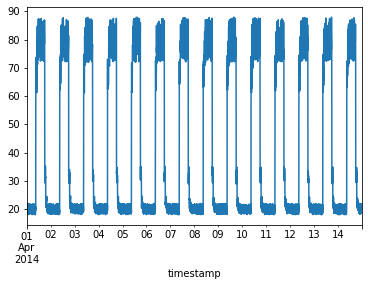

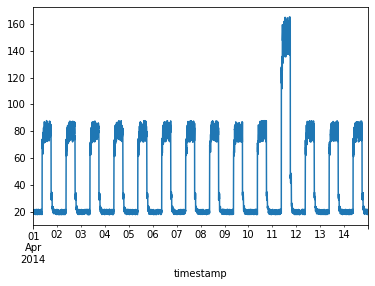

In [1]:
#source: https://towardsdatascience.com/time-series-forecasting-with-autoregressive-processes-ba629717401

from statsmodels.graphics.tsaplots import plot_pacf   
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import numpy as np
import pandas as pd


master_url_root = "https://raw.githubusercontent.com/numenta/NAB/master/data/"

df_small_noise_url_suffix = "artificialNoAnomaly/art_daily_small_noise.csv"
df_small_noise_url = master_url_root + df_small_noise_url_suffix
df_small_noise = pd.read_csv(
    df_small_noise_url, parse_dates=True, index_col="timestamp"
)

df_daily_jumpsup_url_suffix = "artificialWithAnomaly/art_daily_jumpsup.csv"
df_daily_jumpsup_url = master_url_root + df_daily_jumpsup_url_suffix
df_daily_jumpsup = pd.read_csv(
    df_daily_jumpsup_url, parse_dates=True, index_col="timestamp"
)

fig, ax = plt.subplots()
df_small_noise.plot(legend=False, ax=ax)
plt.show()
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
plt.show()


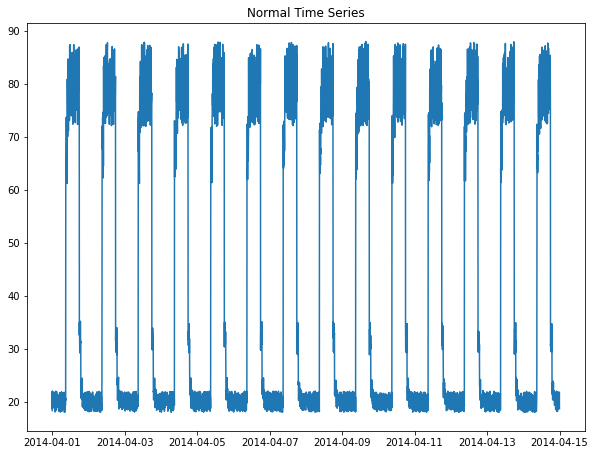

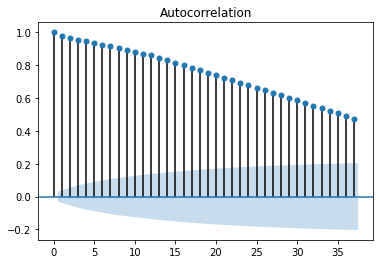

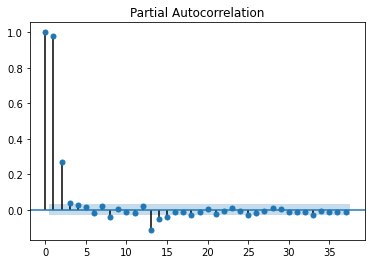

In [3]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(df_small_noise)
plt.title("Normal Time Series")
plt.show()

plot_acf(df_small_noise); #autocorrelation plot
plot_pacf(df_small_noise); #partial autocorrelation plot


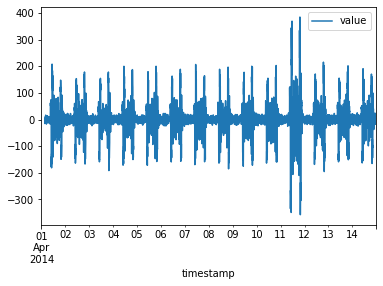

In [57]:
diff_daily_jumpsup=df_daily_jumpsup-df_daily_jumpsup.shift(10)
dif2_daily_jumpsup=diff_daily_jumpsup-diff_daily_jumpsup.shift(10)
dif3_daily_jumpsup=dif2_daily_jumpsup-dif2_daily_jumpsup.shift(10)
dif4_daily_jumpsup=dif3_daily_jumpsup-dif3_daily_jumpsup.shift(10)
dif4_daily_jumpsup.plot()

In [62]:
len(train)

283

In [63]:
# ARIMA example
from statsmodels.tsa.arima_model import ARIMA
from random import random
import operator
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import tensorflow as tf

size=int(0.7*len(dif4_daily_jumpsup))
train, test = dif4_daily_jumpsup.iloc[range(1,size,10),:],dif4_daily_jumpsup.iloc[range(size,len(df_daily_jumpsup),10),:] 
history = [x for x in train]
predictions = list()
print("Predicting on last time points:")
for t in range(len(test)):
    model = ARIMA(history, order=(5,0,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
  # plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Predicting on last time points:


ValueError: ignored

In [64]:
!pip install influxdb

     |████████████████████████████████| 77 kB 4.8 MB/s 


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


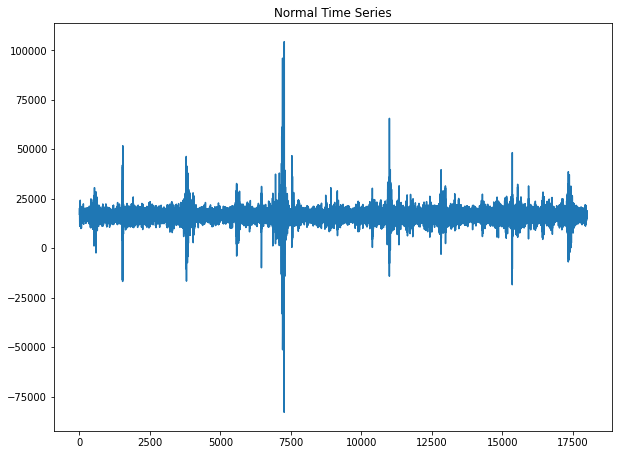

In [66]:
# ARIMA example
from statsmodels.tsa.arima_model import ARIMA
from random import random
from influxdb import InfluxDBClient
import operator
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import tensorflow as tf
# contrived dataset
#data = [x + random() for x in range(1, 100)]

def create_data(type):
    if type=='gen':
      X = [x + random() for x in range(1, 100)]
    
    elif type=='get':
      client = InfluxDBClient("sensorweb.us", "8086", "test", "sensorweb", "shake", ssl=True)
      unit = "b8:27:eb:16:1b:d7"


      stampIni = "2020-08-14T17:22:15.000Z";
      stampEnd = "2020-08-14T17:25:15.000Z";

      query = 'SELECT "value" FROM Z WHERE ("location" = \''+unit+'\')  and time >= \''+stampIni+'\' and time <= \''+stampEnd+'\'   '

      result = client.query(query)
      points = list(result.get_points())

      values =  map(operator.itemgetter('value'), points)
      times  =  map(operator.itemgetter('time'),  points)

      X=list(values)
    return X
      #no of points to use for testing
with tf.device('/device:GPU:0'):
  #parameters get: for influx streaming seismic data; gen: for generating data
    X=create_data('get')
    plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
    plt.plot(X)
    plt.title("Normal Time Series")
    plt.show()

In [74]:
size=len(X)
X_down=[X[i] for i in range(1,size,10)]

In [81]:
len(X_down)

1800

Predicting on last 10 points:
[15560.61976707]
predicted=15560.619767, expected=16296.000000
[17132.18858832]
predicted=17132.188588, expected=15848.000000
[16264.2135817]
predicted=16264.213582, expected=16619.000000
[16750.34384394]
predicted=16750.343844, expected=13628.000000
[16431.09017484]
predicted=16431.090175, expected=16333.000000
[16891.30653487]
predicted=16891.306535, expected=17517.000000
[16152.90981352]
predicted=16152.909814, expected=10019.000000
[16231.70133356]
predicted=16231.701334, expected=20238.000000
[17367.1528081]
predicted=17367.152808, expected=13062.000000
[14998.76797063]
predicted=14998.767971, expected=11352.000000
[17586.22865292]
predicted=17586.228653, expected=22842.000000
[16213.70111169]
predicted=16213.701112, expected=17410.000000
[15568.82052054]
predicted=15568.820521, expected=7901.000000
[16900.01434596]
predicted=16900.014346, expected=20529.000000
[17128.86667896]
predicted=17128.866679, expected=16215.000000
[15252.63627567]
predicted=1

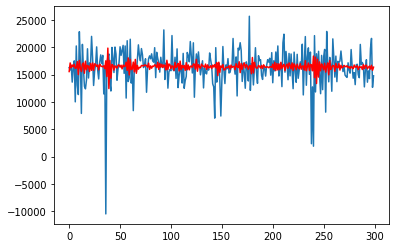

In [82]:
train_size=len(X_down)-300

#size = int(len(X) * 0.66)
train, test = X_down[1:train_size], X_down[train_size:len(X_down)]
history = [x for x in train]
predictions = list()

  #testing model on last 10 points
print("Predicting on last",cnt,"points:")
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    print(yhat)
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
  # plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## Pros and Cons:

### Pros
*   Doe not need any data to train, even do not need normal data to train, just need the full time series.


### Cons
*   Linear relationship, strong assumptions needed. (The error term has to be Gaussian and i.i.d.);
*   Need to check multiple assumptions, like stationary


